In [1]:
%matplotlib inline
from __future__ import print_function
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
digits = load_digits()
X = digits.data
y = digits.target

In [2]:
ones = [X[i] for i in range(len(y)) if y[i] == 1]
zeroes = [X[i] for i in range(len(y)) if y[i] == 0]

In [3]:
def plot_mosaic(a, b):
    f, ax = plt.subplots(2, 8, sharex=True, sharey=True)
    f.set_size_inches(12, 3)
    ax[0,0].set_ylabel('zero', size='large')
    ax[1,0].set_ylabel('one', size='large')
    for i in range(8):
        ax[0, i].imshow(a[i].reshape(8, 8), cmap='gray', interpolation='none')
    for i in range(8, 16):
        ax[1,i % 8].imshow(b[i].reshape(8, 8), cmap='gray', interpolation='none')
    f.tight_layout()

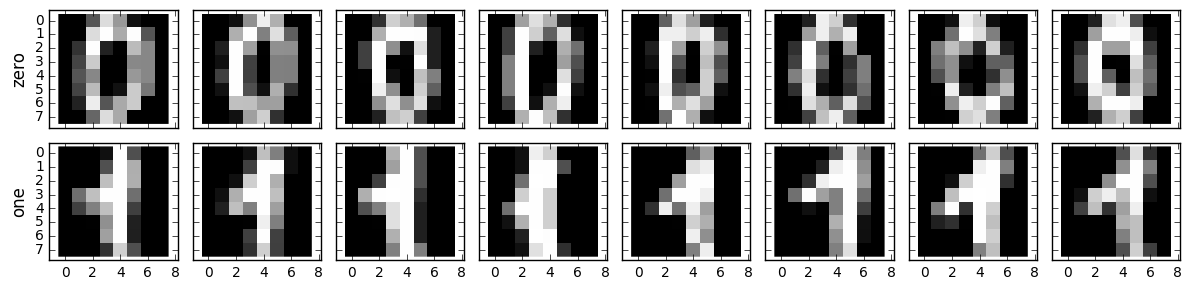

In [4]:
plot_mosaic(zeroes, ones)

Each image is 8 $\times$ 8. We can flatten these into ${8*8 = 64}$ dimensional vectors such that every image is described by a single point in $\mathbb{R}^{64}$. Here is one of those points: 

In [5]:
print(zeroes[0])

[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]


How can we visualize the distribution of these points in $\mathbb{R}^{64}$? We need to approximate the relative positions of the points in 1, 2 or 3 dimensions in order to get a sense for how they are distributed. We can do this with principal components analysis (PCA). The overarching idea here is that our points approximate some high dimensional manifold (a manifold with dimensionality less than or equal to 64), and we can approximate this approximation with dimensionality reduction techniques such as PCA. If this is all very confusing to you, don't worry about it! I'm purposely being vague in my description - a more thorough explanation would require a more rigorous treatment of the math behind PCA. 

Let's try to approximate the relative positions of our points in $\mathbb{R}^3$, then:

In [6]:
from sklearn.decomposition import PCA
both = [X[i] for i in range(len(y)) if y[i] == 0 or y[i] == 1]
labels = [y_ for y_ in y if y_ == 0 or y_ == 1]
pca = PCA(n_components=3)
Xproj3d = pca.fit_transform(both)

`zeroes[0]` is now approximated by this point in $\mathbb{R}^3$:

In [7]:
print(Xproj3d[labels.index(0)]) # labels.index(0) gives us the first index that is 0, i.e., what used to be zeroes[0]

[-24.84615349  -0.89358165   0.58202371]


Of course, this is completely meaningless without the rest of the points for context.

In [8]:
print(Xproj3d)

[[-24.84615349  -0.89358165   0.58202371]
 [ 30.66310441  -0.59384848  -1.41944624]
 [-17.33460726  -1.15844127  -7.91068157]
 ..., 
 [-11.30249199 -12.70038879  -0.89638029]
 [ 17.69438032  -4.98647743 -15.91874413]
 [-23.25253527  -1.14235758  -9.17561739]]


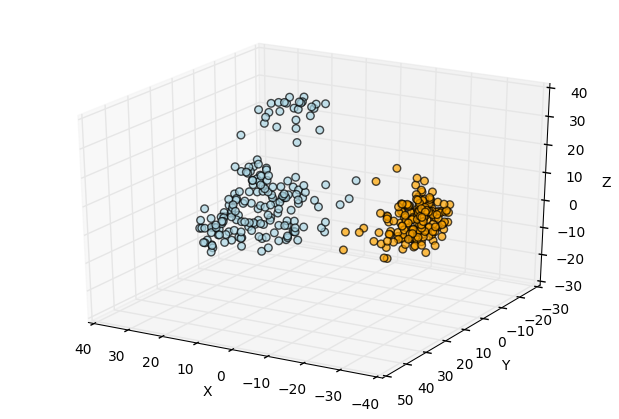

In [9]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax3d = Axes3D(fig)
ax3d.set_xlabel('X')
ax3d.set_ylabel('Y')
ax3d.set_zlabel('Z')
ax3d.view_init(elev=25., azim=120)
colors = ['orange' if y == 0 else 'lightblue' for y in labels]
ax3d.scatter(Xproj3d.T[0], Xproj3d.T[1], Xproj3d.T[2], c=colors, s=30, alpha=0.7)

The 0s are an amber color and the 1s are turquoise in the above plot. It looks like they form two (three?) distinct clusters! How does the two-dimensional projection look?

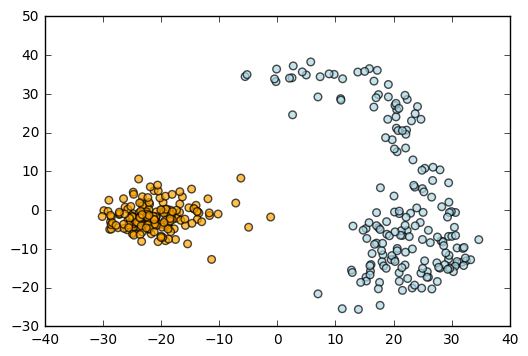

In [10]:
pca = PCA(n_components=2)
Xproj2d = pca.fit_transform(both)
plt.scatter(Xproj2d.T[0], Xproj2d.T[1], c=colors, s=30, alpha=0.7)

The data is most definitely non-linearly seperable (with a curve) and maybe even linearly seperable (with a line)! With some supervised learning techniques like LDA (or maybe even an unsupervised learning technique like Ward's method) it seems we can say with high confidence that we are be able to teach a computer to distinguish between a 0 and a 1, judging from this dataset.

For another, more in-depth look at PCA using the MNIST dataset, check out Jake Vanderplas (UW faculty member) notebook [here](https://github.com/jakevdp/sklearn_pycon2015/blob/master/notebooks/04.1-Dimensionality-PCA.ipynb).